<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Easy_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 3s 0us/step


Text(0.5, 1.0, 'Label is 9')

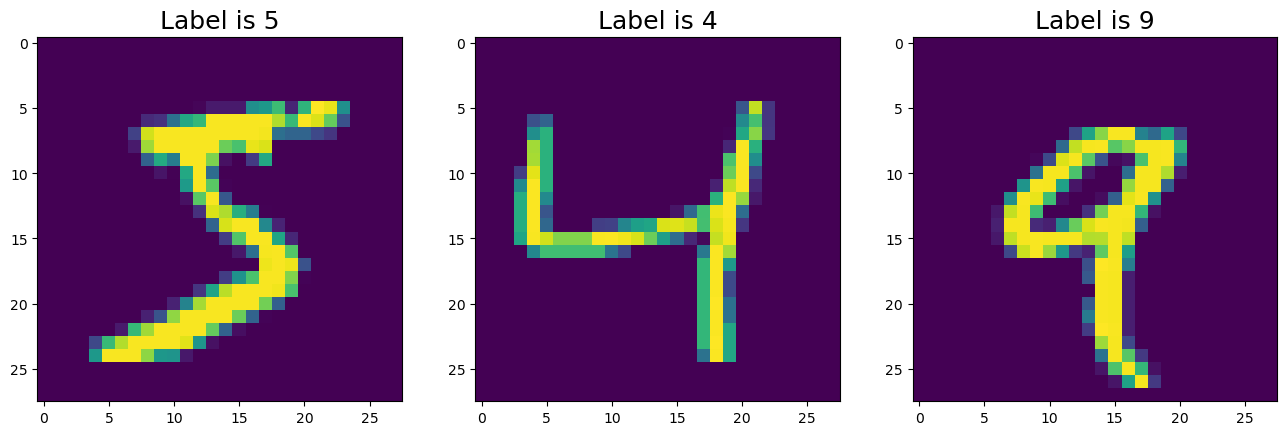

In [3]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-02-02 17:27:50.806167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-02 17:27:50.806279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5


2023-02-02 17:27:51.043528: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 17:27:51.163053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 5ms/step - loss: 0.2924 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1389 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1016 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0812 - accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0702 - accuracy: 0.9782


2023-02-02 17:28:40.500390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0734 - accuracy: 0.9771 - 1s/epoch - 4ms/step


[0.07342083752155304, 0.9771000742912292]

In [6]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 [==============================] - 0s 215ms/step


2023-02-02 17:28:41.792084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([6.3627867e-11, 8.7726848e-09, 2.9359494e-08, 3.2438993e-02,
       5.0912408e-18, 9.6756095e-01, 2.9277446e-13, 6.1064278e-09,
       3.9116502e-11, 8.1605123e-08], dtype=float32)

1/1 [==============================] - 0s 11ms/step


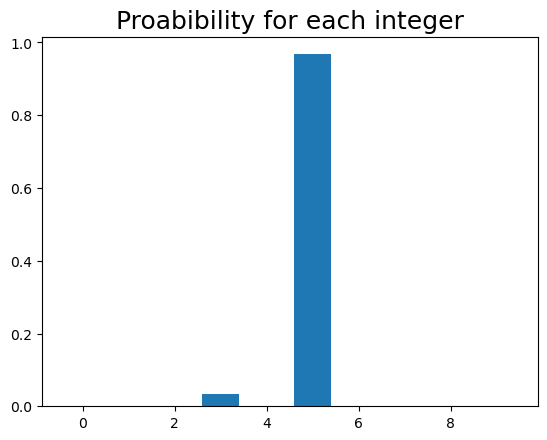

In [7]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()